In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [91]:
anime = pd.read_csv('raw_data/anime.csv')

In [92]:
rating = pd.read_csv('raw_data/rating.csv')

# Data Preprocessing / Cleaning
***

## Data Head, Shape, and Info

In [93]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [94]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [95]:
print('anime dataset size:', anime.shape)
print('rating dataset size:', rating.shape)

anime dataset size: (12294, 7)
rating dataset size: (7813737, 3)


In [96]:
print('anime dataset info:', anime.info())
print('\n')
print('rating dataset info:', rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
anime dataset info: None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
rating dataset info: None


In [97]:
n_anime = anime.anime_id.nunique()
n_rating = rating.user_id.nunique()

print('Number of Animes: '+ str(n_anime))
print('Number of Ratings: '+str(n_rating))

Number of Animes: 12294
Number of Ratings: 73515


## Missing Values

In [98]:
print('Anime Dataset Missing Values (%)\n')
print(round((anime.isnull().sum().sort_values(ascending=False)/len(anime))*100,2))

Anime Dataset Missing Values (%)

rating      1.87
genre       0.50
type        0.20
anime_id    0.00
name        0.00
episodes    0.00
members     0.00
dtype: float64


In [99]:
anime = anime.dropna()
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [100]:
print('Rating Dataset Missing Values (%)\n')
print(round((rating.isnull().sum().sort_values(ascending=False)/len(anime))*100,2))

Rating Dataset Missing Values (%)

user_id     0.0
anime_id    0.0
rating      0.0
dtype: float64


## Feature Engineering

In [101]:
rating['rating'] = rating['rating'].apply(lambda rating: np.nan if rating == -1 else rating)
rating.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [102]:
df = pd.merge(anime,rating,on='anime_id')
df.rename({'rating_x':'overall rating','rating_y':'user rating'},axis=1,inplace=True)
df.head()

,anime_id,name,genre,type,episodes,overall rating,members,user_id,user rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [103]:
df = df[df['type']=='TV']

# Exploratory Data Analysis
***

In [104]:
df.groupby('name')['user rating'].mean().sort_values(ascending=False).head()

name
Gozonji! Gekkou Kamen-kun                    10.0
Choegang Top Plate                           10.0
Play Ball 2nd                                10.0
Hamster Club                                 10.0
Sekai Meisaku Douwa: Wow! Maerchen Oukoku    10.0
Name: user rating, dtype: float64

In [105]:
df.groupby('name')['user rating'].count().sort_values(ascending=False).head()

name
Death Note                         34226
Sword Art Online                   26310
Shingeki no Kyojin                 25290
Code Geass: Hangyaku no Lelouch    24126
Angel Beats!                       23565
Name: user rating, dtype: int64

In [106]:
ratings = pd.DataFrame(df.groupby('name')['user rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['user rating'].count())

<AxesSubplot:>

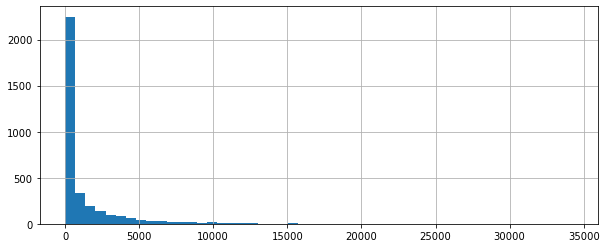

In [107]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=50)

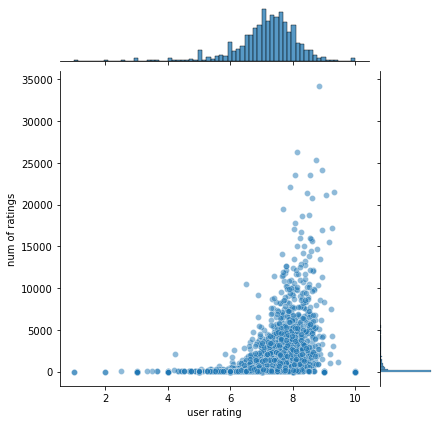

In [108]:
sns.jointplot(x='user rating',y='num of ratings',data=ratings,alpha=0.5)

## .corr() Method

In [109]:
anime_mat = df.pivot_table(index='user_id',columns='name',values='user rating')
anime_mat.head()

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,12-sai.: Chicchana Mune no Tokimeki 2nd Season,2020 Nyeon Ujuui Wonder Kiddy,21 Emon,...,"Zone of the Enders: Dolores, I",Zukkoke Knight: Don De La Mancha,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
def recommendCorrAnime(anime):
    """
    This function will return the top 5 shows with the highest corr similarity value and show match percent
    
    example:
    >>>Input: 
    
    recommendCorrAnime('Sword Art Online')
    
    >>>Output: 
    
    Because You Watched Sword Art Online...

    (1) Sword Art Online II, 69.99% match
    (2) Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka, 53.97% match
    (3) Charlotte, 52.05% match
    (4) Fairy Tail, 51.99% match
    (5) Zero no Tsukaima: Princesses no Rondo, 50.88% match               
    """
    anime_user_ratings = anime_mat[anime]    
    similar_to_anime = anime_mat.corrwith(anime_user_ratings)
    similar_to_anime = pd.DataFrame(similar_to_anime,columns=['correlation'])
    similar_to_anime.dropna(inplace=True)
    similar_to_anime = similar_to_anime.join(ratings['num of ratings'])
    similar_to_anime = similar_to_anime[similar_to_anime['num of ratings']>5000].sort_values('correlation',ascending=False)
    print('Because You Watched',anime+'...')
    print('\n')
    for i in range(1,6):
        print('('+str(i)+') '+similar_to_anime.iloc[i].name+', '+str(round(similar_to_anime.iloc[i]['correlation']*100,2))+'% match')

In [111]:
recommendCorrAnime('Naruto')

Because You Watched Naruto...


(1) Bleach, 54.7983% match
(2) Fairy Tail, 44.4271% match
(3) Dragon Ball Z, 43.7442% match
(4) InuYasha, 43.31% match
(5) Dragon Ball GT, 42.9704% match


## Cosine Similarity Method

In [112]:
anime_mat = anime_mat.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

anime_mat.fillna(0, inplace=True)

anime_mat = anime_mat.T

anime_mat = anime_mat.loc[:, (anime_mat != 0).any(axis=0)]

anime_mat_sparse = sp.sparse.csr_matrix(anime_mat.values)

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

In [114]:
anime_similarity = cosine_similarity(anime_mat_sparse)
anime_sim_df = pd.DataFrame(anime_similarity, index = anime_mat.index, columns = anime_mat.index)

In [115]:
anime_sim_df.head()

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,009-1,07-Ghost,11eyes,12-sai.: Chicchana Mune no Tokimeki,12-sai.: Chicchana Mune no Tokimeki 2nd Season,2020 Nyeon Ujuui Wonder Kiddy,21 Emon,...,"Zone of the Enders: Dolores, I",Zukkoke Knight: Don De La Mancha,ef: A Tale of Melodies.,ef: A Tale of Memories.,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei
name,,,,,,,,,,,,,,,,,,,,,
.hack//Roots,1.000000,0.182185,0.237907,0.021071,0.034607,0.037359,-0.000875,0.0,0.0,0.0,...,0.003789,0.021568,-0.025617,-0.032801,-0.000448,-0.002504,0.006867,0.023500,-0.023786,-0.028910
.hack//Sign,0.182185,1.000000,0.154746,0.014222,0.027775,0.038224,-0.002392,0.0,0.0,0.0,...,-0.004751,0.007560,-0.014067,-0.013091,-0.005191,-0.003166,-0.003800,0.026906,-0.010065,-0.019824
.hack//Tasogare no Udewa Densetsu,0.237907,0.154746,1.000000,0.043071,0.025451,0.050659,-0.007998,0.0,0.0,0.0,...,0.014320,0.000716,-0.024023,-0.029475,0.000353,0.001626,0.006833,0.034604,-0.025847,-0.035600
009-1,0.021071,0.014222,0.043071,1.000000,0.015120,0.027828,-0.009975,0.0,0.0,0.0,...,0.009020,0.000000,-0.010479,-0.012204,0.012579,0.015134,0.010743,0.005100,-0.007922,-0.013433
07-Ghost,0.034607,0.027775,0.025451,0.015120,1.000000,0.065813,-0.007457,0.0,0.0,0.0,...,0.009338,0.014776,-0.024471,-0.027122,-0.009576,-0.002122,0.001475,0.014200,-0.013395,-0.015548


In [116]:
def recommendCSAnime(anime):
    """
    This function will return the top 5 shows with the highest cosine similarity value and show match percent
    
    example:
    >>>Input: 
    
    recommendCSAnime('Sword Art Online')
    
    >>>Output: 
    
    Because You Watched Sword Art Online...

    (1) Sword Art Online II, 69.99% match
    (2) Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka, 53.97% match
    (3) Charlotte, 52.05% match
    (4) Fairy Tail, 51.99% match
    (5) Zero no Tsukaima: Princesses no Rondo, 50.88% match               
    """
    print('Because You Watched',anime+'...')
    num = 1
    for i in anime_sim_df.sort_values(by = anime, ascending = False).index[1:6]:
        print('('+str(num)+') '+i+',',str(round(anime_sim_df[i][anime]*100,2))+'% match')
        num += 1

In [117]:
recommendCSAnime('Dragon Ball Z')

Because You Watched Dragon Ball Z...
(1) Dragon Ball, 39.79% match
(2) Dragon Ball Kai, 11.9% match
(3) Yuu☆Yuu☆Hakusho, 11.32% match
(4) Death Note, 9.51% match
(5) Rurouni Kenshin: Meiji Kenkaku Romantan, 9.29% match
